Github clone for getting dataset

Notice: If you want to evaluate this code in your local PC, I am requesting you to download the dataset and use appropriate data path to load perfectly.

In [1]:
!git clone https://github.com/swemasum/DS-project-2.git

Cloning into 'DS-project-2'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), 4.39 KiB | 4.39 MiB/s, done.


Load dataset

In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/DS-project-2/MP2_Data.csv'
data = pd.read_csv(file_path)


View some basic information

In [3]:
# Display basic info and first few rows of the dataset
data_info = data.info()
data_head = data.head()

(data_info, data_head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           107 non-null    object 
 1   Week2_Quiz1  107 non-null    float64
 2   Week3_MP1    107 non-null    float64
 3   Week3_PR1    107 non-null    float64
 4   Week5_MP2    107 non-null    float64
 5   Week5_PR2    107 non-null    float64
 6   Week7_MP3    107 non-null    float64
 7   Week7_PR3    107 non-null    float64
 8   Week4_Quiz2  107 non-null    float64
 9   Week6_Quiz3  107 non-null    float64
 10  Week8_Total  107 non-null    float64
 11  Week1_Stat0  107 non-null    int64  
 12  Week1_Stat1  107 non-null    int64  
 13  Week1_Stat2  107 non-null    int64  
 14  Week1_Stat3  107 non-null    int64  
 15  Week2_Stat0  107 non-null    int64  
 16  Week2_Stat1  107 non-null    int64  
 17  Week2_Stat2  107 non-null    int64  
 18  Week2_Stat3  107 non-null    int64  
 19  Week3_St

(None,
           ID  Week2_Quiz1  Week3_MP1  Week3_PR1  Week5_MP2  Week5_PR2  \
 0  ML-2020-1         5.00       15.0        5.0      16.09       5.00   
 1  ML-2020-2         3.33       15.0        5.0      17.83       5.00   
 2  ML-2020-3         1.67       13.0        5.0      15.22       5.00   
 3  ML-2020-4         2.50       14.0        5.0      10.00       5.00   
 4  ML-2020-6         0.00       15.0        5.0      12.17       4.93   
 
    Week7_MP3  Week7_PR3  Week4_Quiz2  Week6_Quiz3  ...  Week7_Stat3  \
 0      21.88        5.0         5.00          5.0  ...            0   
 1      22.27        5.0         4.00          5.0  ...            8   
 2      27.05        2.5         5.00          5.0  ...            0   
 3      31.02        5.0         3.13          5.0  ...            4   
 4      15.91        5.0         4.67          5.0  ...            6   
 
    Week8_Stat0  Week8_Stat1  Week8_Stat2  Week8_Stat3  Week9_Stat0  \
 0            5            4            0 

Below: Heatmap of the correlation matrix

=> Positive Correlation: Features that show a dark red color suggest they have a positive correlation with each other. When one feature increases, the other feature tends to increase as well.

=> Negative Correlation: Features that show a dark blue color suggest they have a negative correlation with each other. When one feature increases, the other feature tends to decrease.

=> No or Weak Correlation: Features that show a light color suggest they have no or weak correlation with each other.

<ipython-input-4-7e5f21a885c8>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


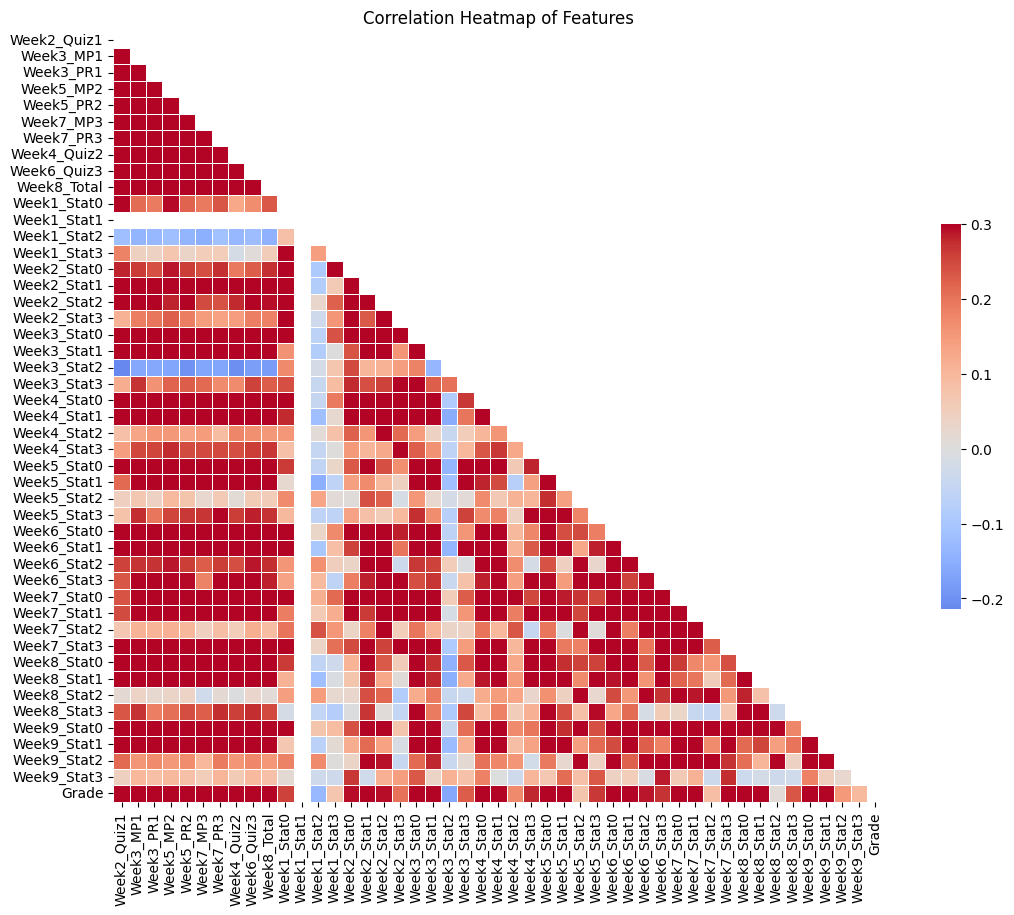

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15, 10))
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap="coolwarm", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()

Below, I chose the top three correlated columns for distribution among 48 columns. They are Week8_Total, Week7_MP3 and Week5_MP2.

In [5]:
# Calculate the correlation with 'Grade' for each variable
correlation_with_grade = data.corr()['Grade'].drop('Grade', errors='ignore').abs()

top_correlated_vars = correlation_with_grade.sort_values(ascending=False).head(3).index

correlation_with_grade[top_correlated_vars]


<ipython-input-5-4214c09b7233>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_grade = data.corr()['Grade'].drop('Grade', errors='ignore').abs()


Week8_Total    0.972348
Week7_MP3      0.968130
Week5_MP2      0.953488
Name: Grade, dtype: float64

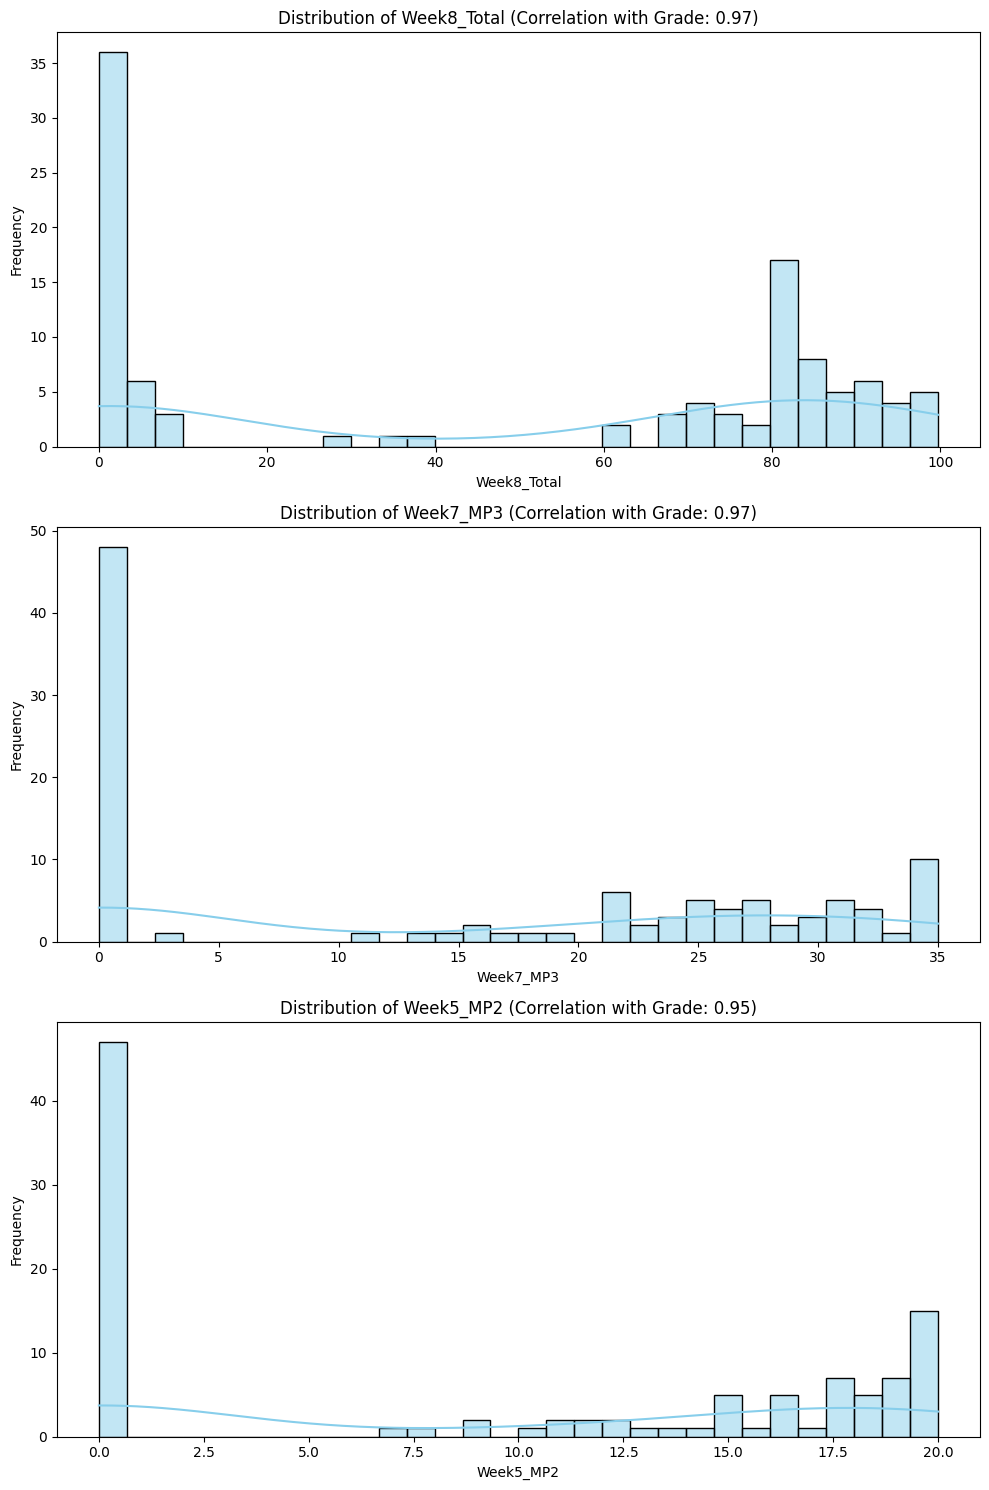

In [6]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

for i, var in enumerate(top_correlated_vars):
    sns.histplot(data[var], bins=30, kde=True, ax=axs[i], color='skyblue')
    axs[i].set_title(f'Distribution of {var} (Correlation with Grade: {correlation_with_grade[var]:.2f})')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



Below: Week8_Total vs. Grade: Displays a strong linear correlation, meaning as "Week8_Total" increases, "Grade" tends to increase as well.


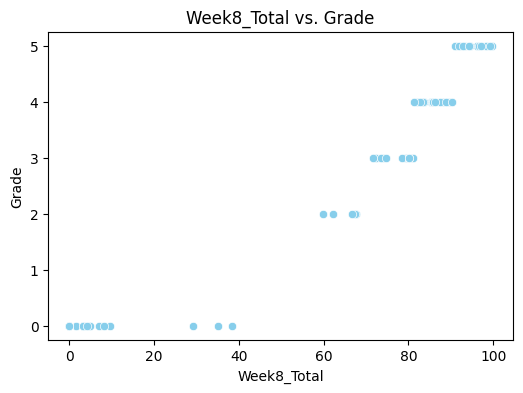

In [7]:
# Scatter plot for Week8_Total vs. Grade
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Week8_Total', y='Grade', data=data, color='skyblue')
plt.title('Week8_Total vs. Grade')
plt.xlabel('Week8_Total')
plt.ylabel('Grade')
plt.show()

Below:  Week7_MP3 vs. Grade: Also shows a strong linear relationship with "Grade", similar to "Week8_Total".

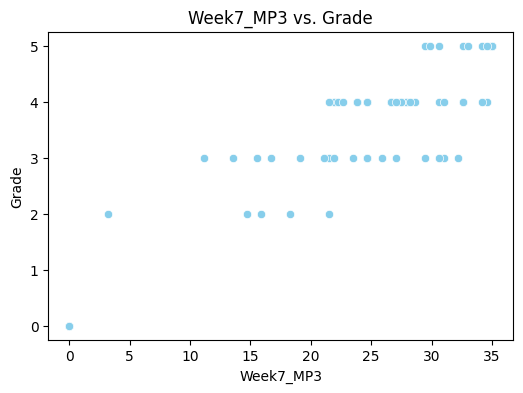

In [8]:
# Scatter plot for Week7_MP3 vs. Grade
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Week7_MP3', y='Grade', data=data, color='skyblue')
plt.title('Week7_MP3 vs. Grade')
plt.xlabel('Week7_MP3')
plt.ylabel('Grade')
plt.show()

Below: Week5_MP2 vs. Grade: Exhibits a linear relationship, but with slightly more variability compared to the other two variables.

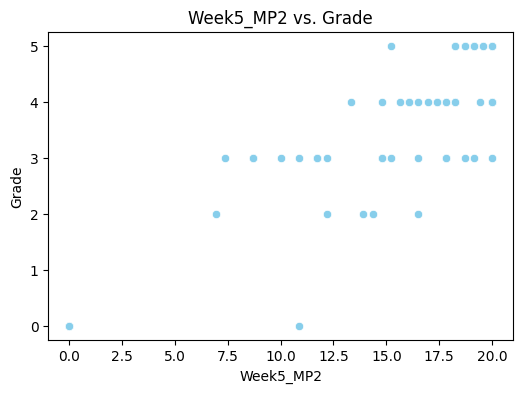

In [9]:
# Scatter plot for Week5_MP2 vs. Grade
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Week5_MP2', y='Grade', data=data, color='skyblue')
plt.title('Week5_MP2 vs. Grade')
plt.xlabel('Week5_MP2')
plt.ylabel('Grade')
plt.show()

Below:
The "Grade" distribution is left-skewed, and we can understand most of the students are getting good grades

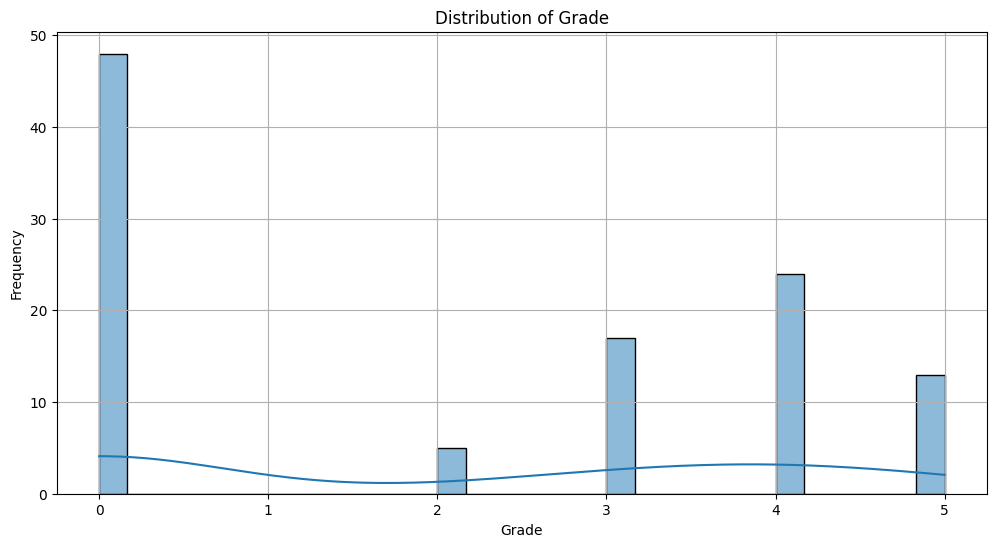

In [10]:
plt.figure(figsize=(12, 6))


sns.histplot(data['Grade'], bins=30, kde=True)
plt.title('Distribution of Grade')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Below, I applied linear regrassion without any preprocessing and got 78% accuracy

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


data = data.drop(columns=['ID'])

X = data.drop(columns=['Grade'])
y = data['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2_test_score = model.score(X_test, y_test)

r2_test_score

0.7819480920326762

Below, I showed a line graph of the accuracy where i compared predicted and actual value

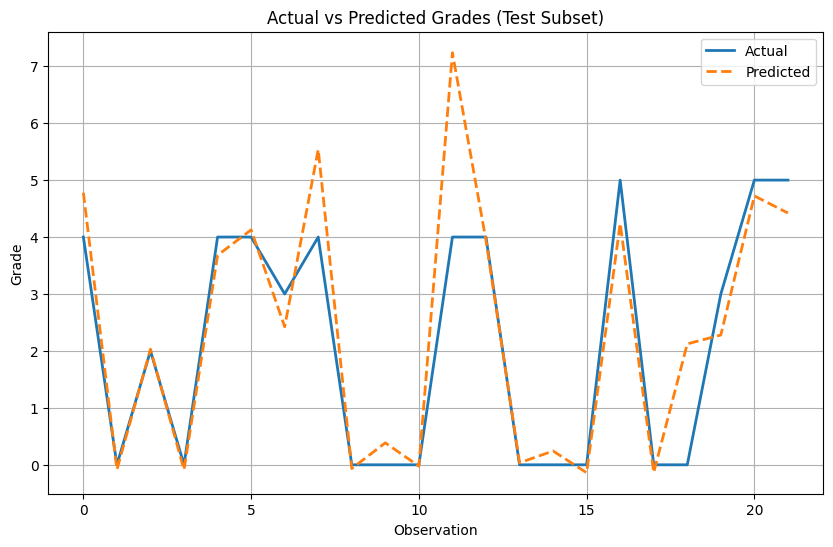

In [12]:

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred_test, label='Predicted', linewidth=2, linestyle='dashed')
plt.xlabel('Observation')
plt.ylabel('Grade')
plt.title('Actual vs Predicted Grades (Test Subset)')
plt.legend()
plt.grid(True)
plt.show()

  Below, I took high correlated variables with the target varibales. The threshold value is 0.4

In [13]:

correlation_with_grade = data.corr()['Grade'].drop('Grade')

selected_features = correlation_with_grade[correlation_with_grade.abs() > 0.4].index



selected_features

Index(['Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2',
       'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week8_Total',
       'Week2_Stat1', 'Week3_Stat0', 'Week3_Stat1', 'Week4_Stat0',
       'Week4_Stat1', 'Week5_Stat0', 'Week5_Stat1', 'Week6_Stat0',
       'Week6_Stat1', 'Week7_Stat1', 'Week7_Stat3', 'Week8_Stat0',
       'Week8_Stat1', 'Week9_Stat0', 'Week9_Stat1'],
      dtype='object')

After reducing some less correlated variables there is a significant improvement in the linear regression model and we got accuracy of 84.6%

In [14]:
X_selected = X[selected_features]

X_train_selected, X_test_selected, _, _ = train_test_split(X_selected, y, test_size=0.2, random_state=42)

model_selected = LinearRegression()
model_selected.fit(X_train_selected, y_train)

r2_test_selected = model_selected.score(X_test_selected, y_test)

y_pred_test_selected = model_selected.predict(X_test_selected)
r2_test_selected

0.8465732856539996

Below I showed a line graph of the accuracy where i compared predicted and actual value

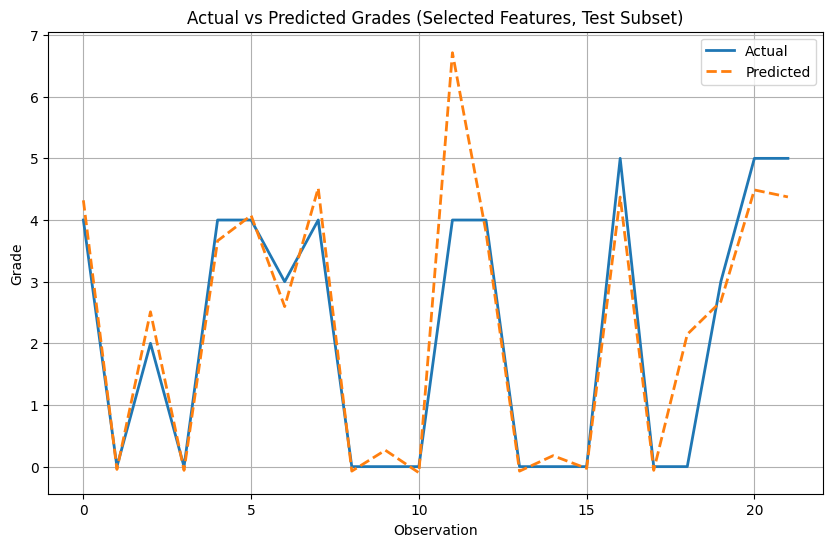

In [15]:
# Plotting (using only test subset and selected features)
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred_test_selected, label='Predicted', linewidth=2, linestyle='dashed')
plt.xlabel('Observation')
plt.ylabel('Grade')
plt.title('Actual vs Predicted Grades (Selected Features, Test Subset)')
plt.legend()
plt.grid(True)
plt.show()

Below, I printed most important features for predicting the the grade based on the Coefficient and found that Week3_PR1, Week3_MP1 and Week7_PR3 are the top three features to predict the grade.

In [16]:
coefficients = model_selected.coef_

coeff_df = pd.DataFrame({'Feature': X_train_selected.columns, 'Coefficient': coefficients})

coeff_df = coeff_df.iloc[coeff_df['Coefficient'].abs().argsort()[::-1]].reset_index(drop=True)

coeff_df.head(3)

,Feature,Coefficient
0,Week3_PR1,-0.452120
1,Week3_MP1,0.138885
2,Week7_PR3,0.093690


Below, I applied the random forest algorithm on the original dataset and got very good accuracy that is around 98.8%

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

r2_test_rf = rf_model.score(X_test, y_test)

y_pred_test_rf = rf_model.predict(X_test)



r2_test_rf

0.9886770741286205

Below I showed a line graph of the accuracy where i compared predicted and actual value

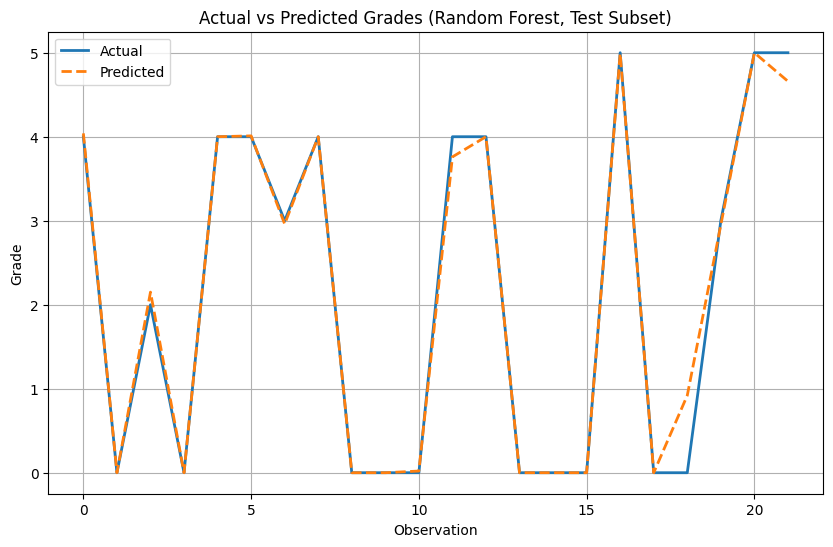

In [18]:
# Plotting (using only test subset)
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred_test_rf, label='Predicted', linewidth=2, linestyle='dashed')
plt.xlabel('Observation')
plt.ylabel('Grade')
plt.title('Actual vs Predicted Grades (Random Forest, Test Subset)')
plt.legend()
plt.grid(True)
plt.show()

Below, I applied the random forest algorithm on the filtered dataset and got very good accuracy that is around 98.7%. Interestingly there is a very slight decrease can be seen.

In [19]:

rf_model_selected = RandomForestRegressor(random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

r2_test_rf_selected = rf_model_selected.score(X_test_selected, y_test)

y_pred_test_rf_selected = rf_model_selected.predict(X_test_selected)

r2_test_rf_selected

0.9870905252822779

Below, I showed a line graph of the accuracy where i compared predicted and actual value

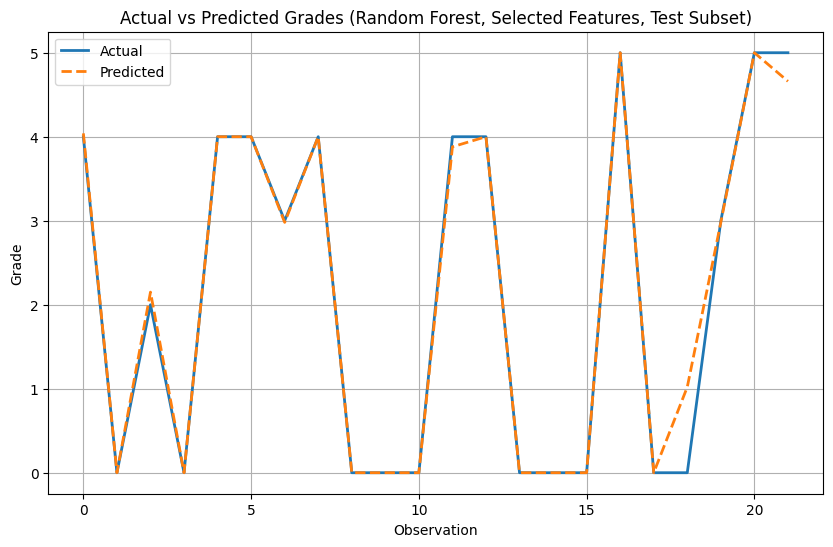

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred_test_rf_selected, label='Predicted', linewidth=2, linestyle='dashed')
plt.xlabel('Observation')
plt.ylabel('Grade')
plt.title('Actual vs Predicted Grades (Random Forest, Selected Features, Test Subset)')
plt.legend()
plt.grid(True)
plt.show()

Below, I printed most important features for predicting the the grade based on the feateare importance function in random forest model and found that Week8_Total, Week5_MP2 and Week7_MP3 are the top three features to predict the grade.

In [21]:
feature_importances = rf_model.feature_importances_

importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

importances_df = importances_df.iloc[importances_df['Importance'].argsort()[::-1]].reset_index(drop=True)

importances_df.head(3)

,Feature,Importance
0,Week8_Total,0.407530
1,Week5_MP2,0.259435
2,Week7_MP3,0.197750
